# Problem Statement
Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user
adoption .  

We  suggest  spending  1 tp 2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.

In [1]:
# load the necessary packages
import pandas as pd
from datetime import datetime


In [2]:
# read in the 2 csvs
engagement = pd.read_csv("takehome_user_engagement.csv")
users = pd.read_csv("takehome_users.csv", encoding='latin-1')

In [3]:
# take a look at the engagement table
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Defining Adopted User

In [4]:
#convert time stamp column to a pandas date time object
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])


In [5]:
# make a copy of the df just in case
df = engagement

The linebelow creates a column, cum_count, listing the number of log ins within the past 7 days.

In [6]:
df['cum_count'] = df.groupby(['user_id', pd.Grouper(freq='7D', key='time_stamp')]).cumcount()
df.head(20)

,time_stamp,user_id,visited,cum_count
0,2014-04-22 03:53:30,1,1,0
1,2013-11-15 03:45:04,2,1,0
2,2013-11-29 03:45:04,2,1,0
3,2013-12-09 03:45:04,2,1,0
4,2013-12-25 03:45:04,2,1,0
5,2013-12-31 03:45:04,2,1,0
6,2014-01-08 03:45:04,2,1,0
7,2014-02-03 03:45:04,2,1,0
8,2014-02-08 03:45:04,2,1,0
9,2014-02-09 03:45:04,2,1,1


With this dataframe, we can determine the unique users with a cum_count pof 3

In [7]:
adopted_users = df.loc[df.iloc[:,3] >= 3].user_id.unique().tolist()

In [8]:
adopted_users[0:11]

[10, 42, 43, 63, 69, 74, 81, 82, 87, 133, 135]

# Creating the Adopted and Not Adopted User Dataframe

In [10]:
# create an adopted users df
adopted = users[users['object_id'].isin(adopted_users)]
adopted["is_adopted"] = 1
adopted.head(10)

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,1
42,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,1
62,63,2012-12-20 16:30:52,Martins Leonor,LeonorAraujoMartins@gmail.com,SIGNUP_GOOGLE_AUTH,1.401899e+09,0,0,203,NaN,1
68,69,2012-06-29 10:15:18,Bowen Alisha,AlishaBowen@gustr.com,GUEST_INVITE,1.401445e+09,0,0,107,5022.0,1
73,74,2013-01-14 00:02:41,Farrell Jack,JackFarrell@gmail.com,SIGNUP_GOOGLE_AUTH,1.377303e+09,0,0,89,NaN,1
80,81,2013-06-26 03:57:41,Cardoso Rafael,RafaelCostaCardoso@yahoo.com,PERSONAL_PROJECTS,1.401249e+09,1,0,185,NaN,1
81,82,2013-02-12 02:10:40,Nygaard Nicklas,NicklasJNygaard@gmail.com,GUEST_INVITE,1.401848e+09,0,0,91,3732.0,1
86,87,2013-09-11 22:53:29,Martins Isabela,IsabelaAzevedoMartins@jourrapide.com,SIGNUP,1.400799e+09,1,0,26,NaN,1
132,133,2013-09-12 12:39:43,Melo Matilde,MatildeFernandesMelo@gmail.com,SIGNUP,1.400417e+09,0,0,249,NaN,1


In [11]:
# create a non adopted users df
notadopted = users[~users.index.isin(adopted.index)]
notadopted["is_adopted"] = 0
notadopted.head(10)

/home/thebbennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN,0


In [37]:
eda = pd.concat([adopted, notadopted])

# Data Explorations

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns



In [40]:
eda.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,COUNTER
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1,1
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,1,1
42,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,1,1
62,63,2012-12-20 16:30:52,Martins Leonor,LeonorAraujoMartins@gmail.com,SIGNUP_GOOGLE_AUTH,1.401899e+09,0,0,203,NaN,1,1
68,69,2012-06-29 10:15:18,Bowen Alisha,AlishaBowen@gustr.com,GUEST_INVITE,1.401445e+09,0,0,107,5022.0,1,1


## Creation Source

In [123]:
eda['COUNTER'] =1       #initially, set that counter to 1.
group_data = eda.groupby(['creation_source','is_adopted'])['COUNTER'].sum() #sum function
group_data = group_data.to_frame().reset_index()
group_data

,creation_source,is_adopted,COUNTER
0,GUEST_INVITE,0,1897
1,GUEST_INVITE,1,266
2,ORG_INVITE,0,3856
3,ORG_INVITE,1,398
4,PERSONAL_PROJECTS,0,1993
5,PERSONAL_PROJECTS,1,118
6,SIGNUP,0,1862
7,SIGNUP,1,225
8,SIGNUP_GOOGLE_AUTH,0,1223
9,SIGNUP_GOOGLE_AUTH,1,162


In [124]:
group_data.loc[group_data['is_adopted'] == 0, 'normalized'] = group_data['COUNTER']/len(notadopted)
group_data

,creation_source,is_adopted,COUNTER,normalized
0,GUEST_INVITE,0,1897,0.175145
1,GUEST_INVITE,1,266,NaN
2,ORG_INVITE,0,3856,0.356015
3,ORG_INVITE,1,398,NaN
4,PERSONAL_PROJECTS,0,1993,0.184009
5,PERSONAL_PROJECTS,1,118,NaN
6,SIGNUP,0,1862,0.171914
7,SIGNUP,1,225,NaN
8,SIGNUP_GOOGLE_AUTH,0,1223,0.112917
9,SIGNUP_GOOGLE_AUTH,1,162,NaN


In [125]:
group_data.loc[group_data['is_adopted'] == 1, 'normalized'] = group_data['COUNTER']/len(adopted)
group_data

,creation_source,is_adopted,COUNTER,normalized
0,GUEST_INVITE,0,1897,0.175145
1,GUEST_INVITE,1,266,0.227545
2,ORG_INVITE,0,3856,0.356015
3,ORG_INVITE,1,398,0.340462
4,PERSONAL_PROJECTS,0,1993,0.184009
5,PERSONAL_PROJECTS,1,118,0.100941
6,SIGNUP,0,1862,0.171914
7,SIGNUP,1,225,0.192472
8,SIGNUP_GOOGLE_AUTH,0,1223,0.112917
9,SIGNUP_GOOGLE_AUTH,1,162,0.138580


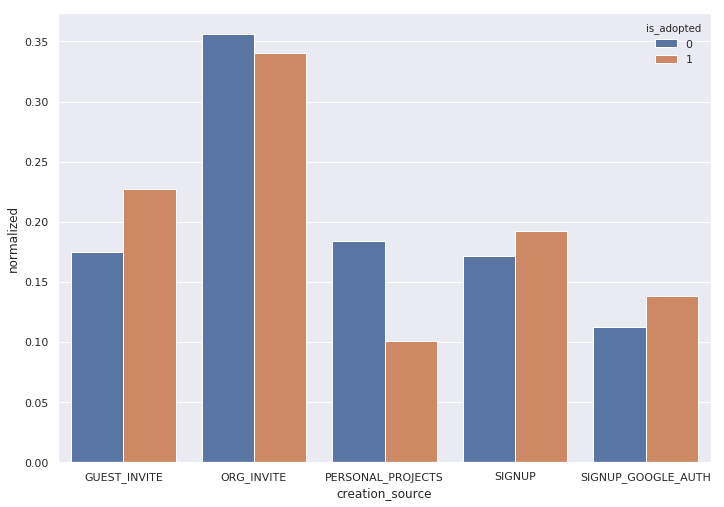

In [126]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="creation_source", y="normalized", hue = "is_adopted", data= group_data)


## Mailing List

In [62]:
eda['COUNTER'] =1       #initially, set that counter to 1.
mailing = eda.groupby(['opted_in_to_mailing_list','is_adopted'])['COUNTER'].sum() #sum function
mailing = mailing.to_frame().reset_index()
mailing

,opted_in_to_mailing_list,is_adopted,COUNTER
0,0,0,8145
1,0,1,861
2,1,0,2686
3,1,1,308


In [127]:
mailing.loc[mailing['is_adopted'] == 0, 'normalized'] = mailing['COUNTER']/len(notadopted)
mailing.loc[group_data['is_adopted'] == 1, 'normalized'] = mailing['COUNTER']/len(adopted)
mailing

,opted_in_to_mailing_list,is_adopted,COUNTER,normalized
0,0,0,8145,0.752008
1,0,1,861,0.736527
2,1,0,2686,0.247992
3,1,1,308,0.263473


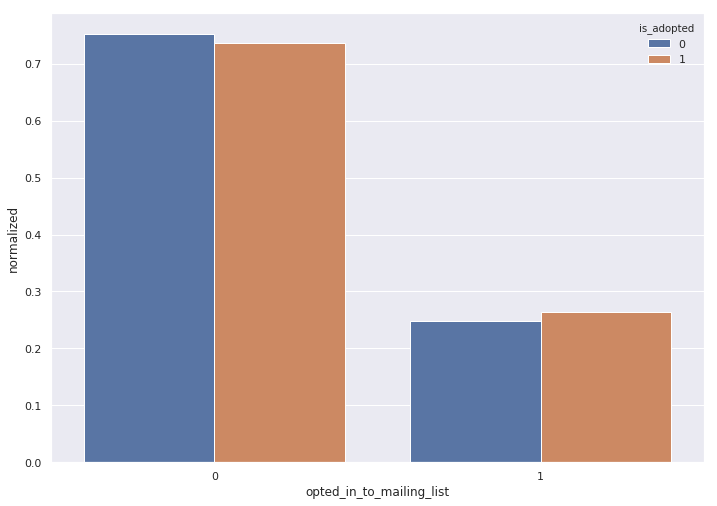

In [128]:
ax = sns.barplot(x="opted_in_to_mailing_list", y="normalized", hue = "is_adopted", data= mailing)


## Marketing Drip

In [134]:
eda['COUNTER'] =1       #initially, set that counter to 1.
marketing = eda.groupby(['enabled_for_marketing_drip','is_adopted'])['COUNTER'].sum() #sum function
marketing = marketing.to_frame().reset_index()
marketing

,enabled_for_marketing_drip,is_adopted,COUNTER
0,0,0,9213
1,0,1,995
2,1,0,1618
3,1,1,174


In [135]:
marketing.loc[marketing['is_adopted'] == 0, 'normalized'] = marketing['COUNTER']/len(notadopted)
marketing.loc[marketing['is_adopted'] == 1, 'normalized'] = marketing['COUNTER']/len(adopted)
marketing

,enabled_for_marketing_drip,is_adopted,COUNTER,normalized
0,0,0,9213,0.850614
1,0,1,995,0.851155
2,1,0,1618,0.149386
3,1,1,174,0.148845


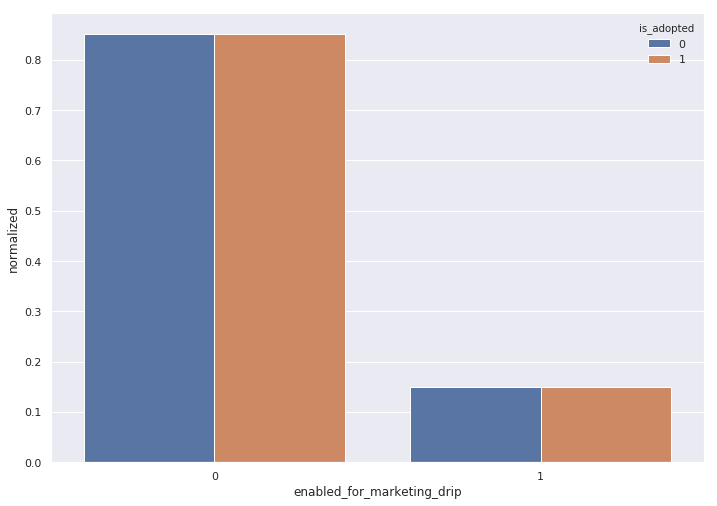

In [136]:
ax = sns.barplot(x="enabled_for_marketing_drip", y="normalized", hue = "is_adopted", data= marketing)
